In [1]:
import numpy as np
import matplotlib.pyplot as plt

# x_train adalah variabel input (luas lahan dalam 100 meter persegi)
# y_train adalah target (harga dalam juta rupiah)
x_train = np.array([2.0, 5.0])  # dalam unit 100 m2
y_train = np.array([150.0, 400.0])  # dalam juta rupiah
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")


x_train = [2. 5.]
y_train = [150. 400.]


In [2]:
m = len(x_train)
print(f"Jumlah contoh data pelatihan adalah: {m}")


Jumlah contoh data pelatihan adalah: 2


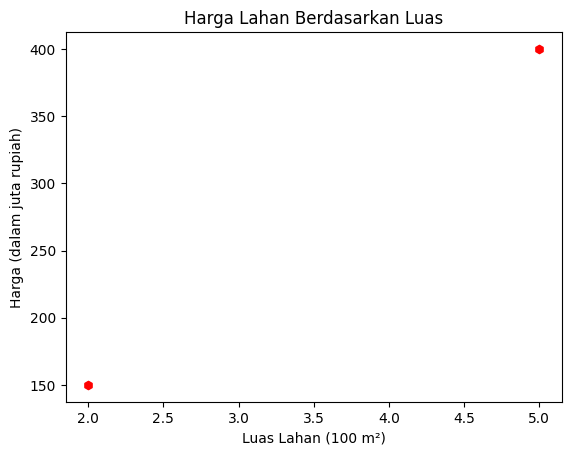

In [3]:
plt.scatter(x_train, y_train, marker='h', c='r')
plt.title("Harga Lahan Berdasarkan Luas")
plt.xlabel("Luas Lahan (100 m²)")
plt.ylabel("Harga (dalam juta rupiah)")
plt.show()


In [7]:
w = 70   # harga per unit (100 m2)
b = 10   # faktor eksternal (misalnya lokasi atau akses jalan)

print(f"w: {w}")
print(f"b: {b}")


w: 70
b: 10


In [4]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb


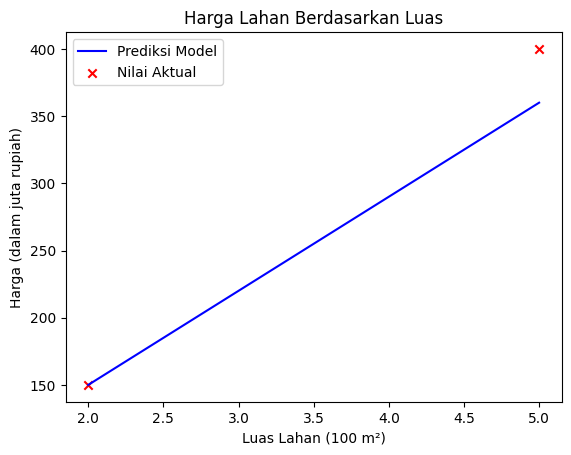

In [9]:
# Menghitung prediksi model
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot prediksi model
plt.plot(x_train, tmp_f_wb, c='b', label='Prediksi Model')

# Plot data aktual
plt.scatter(x_train, y_train, marker='x', c='r', label='Nilai Aktual')

plt.title("Harga Lahan Berdasarkan Luas")
plt.xlabel("Luas Lahan (100 m²)")
plt.ylabel("Harga (dalam juta rupiah)")
plt.legend()
plt.show()


In [10]:
x_i = 3.0
prediksi_harga = w * x_i + b
print(f"Prediksi harga untuk luas 300 m² adalah: Rp{prediksi_harga:.0f} juta")


Prediksi harga untuk luas 300 m² adalah: Rp220 juta


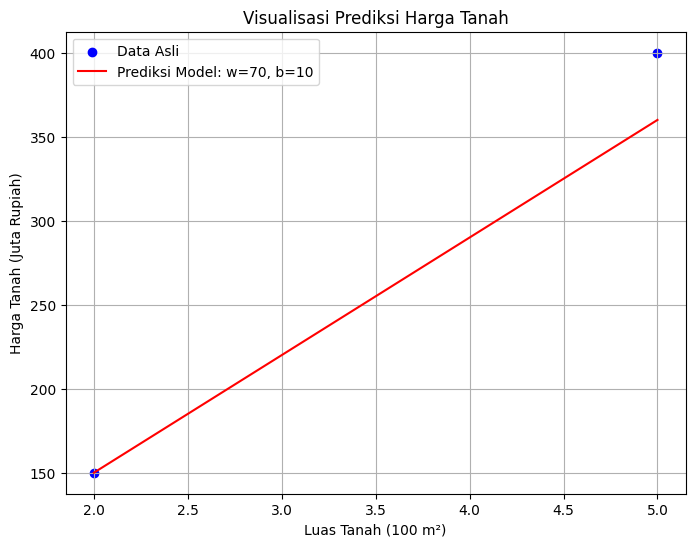

Prediksi Harga Tanah (y-hat): [150. 360.]
Error Kuadrat: [   0. 1600.]
Fungsi Biaya (J(w, b)): 400.0


In [11]:


# Menghitung prediksi (ŷ)
y_hat = w * x_train + b

# Menghitung error kuadrat
error_squared = (y_train - y_hat) ** 2

# Menghitung fungsi biaya (J(w, b))
m = len(x_train)  # jumlah data
J_w_b = (1 / (2 * m)) * np.sum(error_squared)

# Visualisasi
plt.figure(figsize=(8, 6))

# Plot data asli (x_train, y_train)
plt.scatter(x_train, y_train, color='blue', label='Data Asli')

# Plot garis prediksi (ŷ)
plt.plot(x_train, y_hat, color='red', label=f'Prediksi Model: w={w}, b={b}')

# Menambahkan label dan judul
plt.xlabel('Luas Tanah (100 m²)')
plt.ylabel('Harga Tanah (Juta Rupiah)')
plt.title('Visualisasi Prediksi Harga Tanah')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

# Output Fungsi Biaya
print(f"Prediksi Harga Tanah (y-hat): {y_hat}")
print(f"Error Kuadrat: {error_squared}")
print(f"Fungsi Biaya (J(w, b)): {J_w_b}")


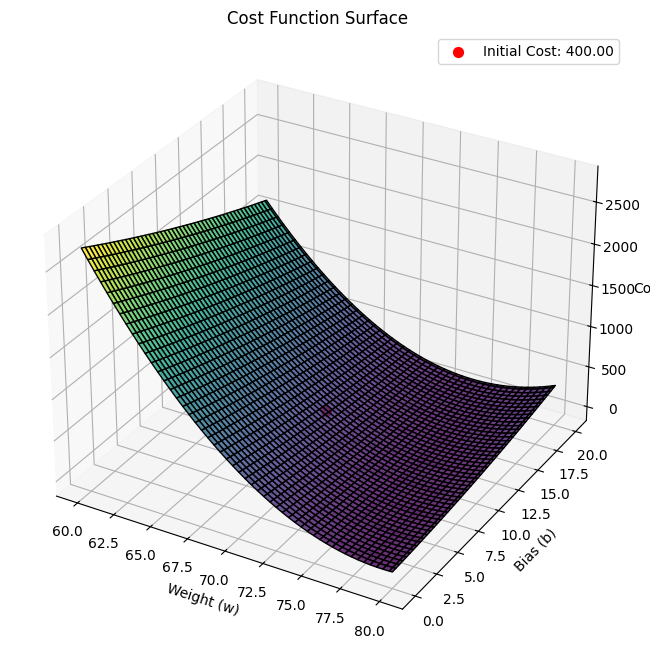

In [12]:
# Data points (luas tanah dan harga tanah)
X = np.array([2.0, 5.0])  # luas tanah dalam satuan 100 m²
Y = np.array([150.0, 400.0])  # harga tanah dalam satuan juta rupiah

# Inisialisasi nilai awal w dan b
w_initial = 70
b_initial = 10

# Fungsi untuk menghitung prediksi harga (y hat)
def predict(x, w, b):
    return w * x + b

# Hitung prediksi dengan nilai awal w dan b
predictions = predict(X, w_initial, b_initial)

# Hitung error kuadrat
errors = (Y - predictions) ** 2
total_error = np.sum(errors)
m = len(X)  # jumlah data
cost = (1 / (2 * m)) * total_error

# Plot permukaan fungsi biaya untuk variasi w dan b
w_range = np.linspace(60, 80, 100)
b_range = np.linspace(0, 20, 100)
cost_values = np.zeros((len(w_range), len(b_range)))

# Menghitung cost untuk setiap kombinasi w dan b
for i in range(len(w_range)):
    for j in range(len(b_range)):
        predictions = predict(X, w_range[i], b_range[j])
        cost_values[i, j] = (1 / (2 * m)) * np.sum((Y - predictions) ** 2)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
W, B = np.meshgrid(w_range, b_range)
ax.plot_surface(W, B, cost_values.T, cmap="viridis", edgecolor='k', alpha=0.8)
ax.set_title("Cost Function Surface")
ax.set_xlabel("Weight (w)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("Cost")

# Menandai titik awal pada permukaan
ax.scatter(w_initial, b_initial, cost, color='red', s=50, label=f'Initial Cost: {cost:.2f}')
ax.legend()

plt.show()


In [13]:

import numpy as np

# Data
x = np.array([2.0, 5.0])  # Luas tanah
y = np.array([150.0, 400.0])  # Harga tanah

# Nilai awal
w = 70  # bobot
b = 10  # bias
learning_rate = 0.01  # learning rate
m = len(x)  # jumlah data

# Fungsi prediksi
def predict(w, b, x):
    return w * x + b

# Fungsi biaya (Mean Squared Error)
def compute_cost(w, b, x, y):
    m = len(x)
    predictions = predict(w, b, x)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Fungsi gradien untuk w
def compute_gradient_w(w, b, x, y):
    m = len(x)
    predictions = predict(w, b, x)
    grad_w = (1 / m) * np.sum((predictions - y) * x)
    return grad_w

# Fungsi gradien untuk b
def compute_gradient_b(w, b, x, y):
    m = len(x)
    predictions = predict(w, b, x)
    grad_b = (1 / m) * np.sum(predictions - y)
    return grad_b

# Langkah 1: Prediksi awal
predictions_initial = predict(w, b, x)
print("Prediksi Awal:", predictions_initial)

# Langkah 2: Hitung biaya awal
cost_initial = compute_cost(w, b, x, y)
print("Biaya Awal:", cost_initial)

# Langkah 3: Hitung gradien untuk w dan b
grad_w = compute_gradient_w(w, b, x, y)
grad_b = compute_gradient_b(w, b, x, y)
print("Gradien w:", grad_w)
print("Gradien b:", grad_b)

# Langkah 4: Update nilai w dan b
w_new = w - learning_rate * grad_w
b_new = b - learning_rate * grad_b
print("Nilai baru w:", w_new)
print("Nilai baru b:", b_new)

# Langkah 5: Prediksi dengan nilai baru w dan b
predictions_new = predict(w_new, b_new, x)
print("Prediksi Baru:", predictions_new)

# Langkah 6: Hitung biaya setelah update
cost_new = compute_cost(w_new, b_new, x, y)
print("Biaya Setelah Update:", cost_new)


Prediksi Awal: [150. 360.]
Biaya Awal: 400.0
Gradien w: -100.0
Gradien b: -20.0
Nilai baru w: 71.0
Nilai baru b: 10.2
Prediksi Baru: [152.2 365.2]
Biaya Setelah Update: 303.9700000000002


# Vektorisasi

x_train = 
[[2. 1.]
 [5. 3.]]
y_train = [150. 400.]
Jumlah contoh data pelatihan adalah: 2


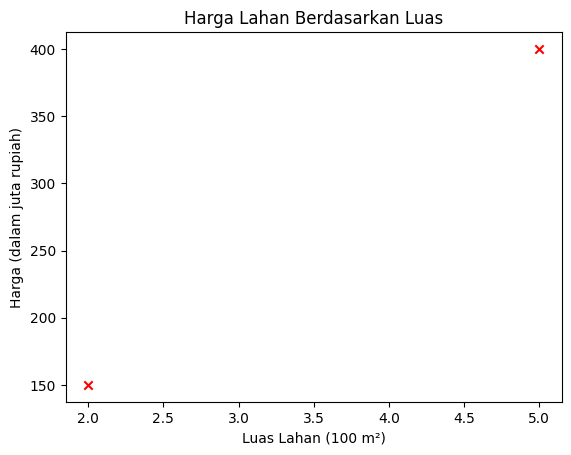

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# x_train adalah matriks fitur dengan setiap kolom adalah satu fitur
# Contoh fitur (luas lahan dalam 100 m² dan jumlah kamar)
x_train = np.array([
    [2.0, 1.0],  # Luas 200 m², 1 kamar
    [5.0, 3.0]   # Luas 500 m², 3 kamar
])
y_train = np.array([150.0, 400.0])  # Harga dalam juta rupiah

print(f"x_train = \n{x_train}")
print(f"y_train = {y_train}")

m = len(x_train)
print(f"Jumlah contoh data pelatihan adalah: {m}")

# Visualisasi data
plt.scatter(x_train[:, 0], y_train, marker='x', c='r')
plt.title("Harga Lahan Berdasarkan Luas")
plt.xlabel("Luas Lahan (100 m²)")
plt.ylabel("Harga (dalam juta rupiah)")
plt.show()


In [15]:
# Inisialisasi parameter
w = np.array([70, 30])  # bobot untuk masing-masing fitur
b = 10  # bias

print(f"w: {w}")
print(f"b: {b}")

w: [70 30]
b: 10


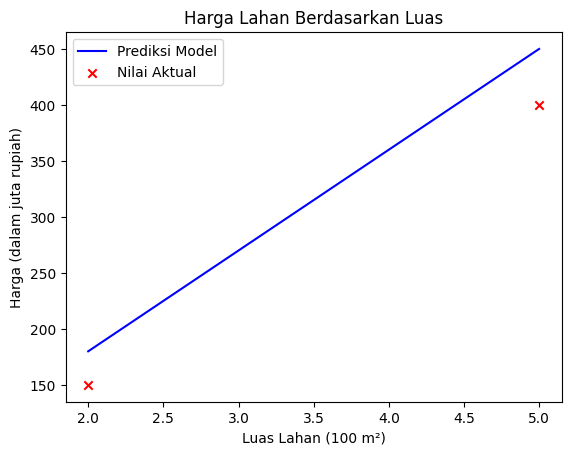

In [16]:
# Fungsi prediksi model dengan vektorisasi
def compute_model_output(X, w, b):
    return np.dot(X, w) + b

# Menghitung prediksi model
y_hat = compute_model_output(x_train, w, b)


# Visualisasi prediksi model
plt.plot(x_train[:, 0], y_hat, c='b', label='Prediksi Model')
plt.scatter(x_train[:, 0], y_train, marker='x', c='r', label='Nilai Aktual')
plt.title("Harga Lahan Berdasarkan Luas")
plt.xlabel("Luas Lahan (100 m²)")
plt.ylabel("Harga (dalam juta rupiah)")
plt.legend()
plt.show()

In [17]:
# Prediksi untuk luas tanah 300 m² dan 2 kamar
x_i = np.array([3.0, 2.0])
prediksi_harga = np.dot(x_i, w) + b
print(f"Prediksi harga untuk luas 300 m² dan 2 kamar adalah: Rp{prediksi_harga:.0f} juta")

Prediksi harga untuk luas 300 m² dan 2 kamar adalah: Rp280 juta


In [18]:
# Fungsi biaya menggunakan vektorisasi
def compute_cost(X, y, w, b):
    m = len(y)
    y_hat = compute_model_output(X, w, b)
    cost = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
    return cost

# Hitung fungsi biaya awal
cost_initial = compute_cost(x_train, y_train, w, b)
print(f"Biaya Awal: {cost_initial}")

Biaya Awal: 850.0


In [19]:
# Fungsi gradien menggunakan vektorisasi
def compute_gradient(X, y, w, b):
    m = len(y)
    y_hat = compute_model_output(X, w, b)
    error = y_hat - y
    grad_w = (1 / m) * np.dot(X.T, error)
    grad_b = (1 / m) * np.sum(error)
    return grad_w, grad_b

# Langkah gradien untuk update parameter
learning_rate = 0.01

# Hitung gradien
grad_w, grad_b = compute_gradient(x_train, y_train, w, b)
print(f"Gradien w: {grad_w}")
print(f"Gradien b: {grad_b}")

# Update parameter
w_new = w - learning_rate * grad_w
b_new = b - learning_rate * grad_b

print(f"Nilai baru w: {w_new}")
print(f"Nilai baru b: {b_new}")

Gradien w: [155.  90.]
Gradien b: 40.0
Nilai baru w: [68.45 29.1 ]
Nilai baru b: 9.6


In [20]:



# Hitung prediksi baru
predictions_new = compute_model_output(x_train, w_new, b_new)
print(f"Prediksi Baru: {predictions_new}")

# Hitung biaya setelah update
cost_new = compute_cost(x_train, y_train, w_new, b_new)
print(f"Biaya Setelah Update: {cost_new}")


Prediksi Baru: [175.6  439.15]
Biaya Setelah Update: 547.0206250000006


In [21]:
import numpy as np

# Input data
x1 = 25  # Ukuran sayap dalam cm
x2 = 0.5  # Berat dalam kg

# Parameter model
w1 = 0.5
w2 = -1.2
b = -2

# Hitung z
z = w1 * x1 + w2 * x2 + b

# Fungsi Sigmoid
probabilitas = 1 / (1 + np.exp(-z))

# Threshold 0.5
prediksi = 1 if probabilitas > 0.5 else 0

print(f"Probabilitas untuk bisa terbang: {probabilitas:.4f}")
print(f"Prediksi kelas: {'Terbang' if prediksi == 1 else 'Tidak Terbang'}")


Probabilitas untuk bisa terbang: 0.9999
Prediksi kelas: Terbang


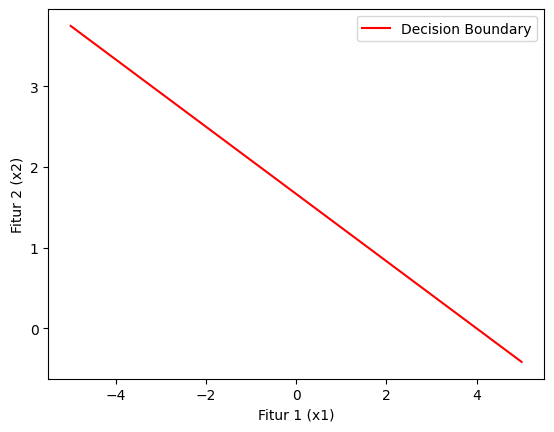

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan parameter model
w1, w2, b = 0.5, 1.2, -2

# Buat grid untuk plot
x1_range = np.linspace(-5, 5, 100)
x2_range = -(w1 * x1_range + b) / w2

# Plot decision boundary
plt.plot(x1_range, x2_range, label="Decision Boundary", color='r')

# Label sumbu
plt.xlabel("Fitur 1 (x1)")
plt.ylabel("Fitur 2 (x2)")
plt.legend()
plt.show()


In [23]:
import numpy as np

# Input data
x1 = 25  # Ukuran sayap dalam cm
x2 = 0.5  # Berat dalam kg
y_true = 1  # Label sebenarnya (1: Terbang, 0: Tidak Terbang)

# Parameter model
w1 = 0.5
w2 = -1.2
b = -2

# Hitung z
z = w1 * x1 + w2 * x2 + b

# Fungsi Sigmoid
probabilitas = 1 / (1 + np.exp(-z))

# Threshold 0.5
prediksi = 1 if probabilitas > 0.5 else 0

# Hitung Cost Function (Binary Cross-Entropy Loss)
cost = -(y_true * np.log(probabilitas) + (1 - y_true) * np.log(1 - probabilitas))

print(f"Probabilitas untuk bisa terbang: {probabilitas:.4f}")
print(f"Prediksi kelas: {'Terbang' if prediksi == 1 else 'Tidak Terbang'}")
print(f"Cost (Binary Cross-Entropy Loss): {cost:.4f}")


Probabilitas untuk bisa terbang: 0.9999
Prediksi kelas: Terbang
Cost (Binary Cross-Entropy Loss): 0.0001


In [24]:
import numpy as np

# Input data
x1 = 25  # Ukuran sayap dalam cm
x2 = 0.5  # Berat dalam kg
y_true = 1  # Label sebenarnya (1: Terbang, 0: Tidak Terbang)

# Parameter model (inisialisasi awal)
w1 = 0.5
w2 = -1.2
b = -2
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Jumlah iterasi gradient descent

for i in range(num_iterations):
    # Hitung z
    z = w1 * x1 + w2 * x2 + b
    
    # Fungsi Sigmoid untuk probabilitas
    y_pred = 1 / (1 + np.exp(-z))
    
    # Hitung Cost Function (Binary Cross-Entropy Loss)
    cost = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    # Hitung gradien untuk setiap parameter
    d_w1 = (y_pred - y_true) * x1
    d_w2 = (y_pred - y_true) * x2
    d_b = (y_pred - y_true)
    
    # Update parameter
    w1 -= learning_rate * d_w1
    w2 -= learning_rate * d_w2
    b -= learning_rate * d_b

    # Optional: Cetak cost tiap beberapa iterasi untuk melihat proses penurunan cost
    if i % 100 == 0:
        print(f"Iterasi {i}: Cost = {cost:.4f}, w1 = {w1:.4f}, w2 = {w2:.4f}, b = {b:.4f}")

# Hasil akhir setelah training
print(f"\nParameter akhir: w1 = {w1:.4f}, w2 = {w2:.4f}, b = {b:.4f}")
print(f"Cost akhir: {cost:.4f}")

# Prediksi akhir probabilitas dan kelas
probabilitas = 1 / (1 + np.exp(-(w1 * x1 + w2 * x2 + b)))
prediksi = 1 if probabilitas > 0.5 else 0

print(f"\nProbabilitas untuk bisa terbang: {probabilitas:.4f}")
print(f"Prediksi kelas: {'Terbang' if prediksi == 1 else 'Tidak Terbang'}")


Iterasi 0: Cost = 0.0001, w1 = 0.5000, w2 = -1.2000, b = -2.0000
Iterasi 100: Cost = 0.0000, w1 = 0.5012, w2 = -1.2000, b = -2.0000
Iterasi 200: Cost = 0.0000, w1 = 0.5024, w2 = -1.2000, b = -1.9999
Iterasi 300: Cost = 0.0000, w1 = 0.5036, w2 = -1.1999, b = -1.9999
Iterasi 400: Cost = 0.0000, w1 = 0.5047, w2 = -1.1999, b = -1.9998
Iterasi 500: Cost = 0.0000, w1 = 0.5058, w2 = -1.1999, b = -1.9998
Iterasi 600: Cost = 0.0000, w1 = 0.5069, w2 = -1.1999, b = -1.9997
Iterasi 700: Cost = 0.0000, w1 = 0.5079, w2 = -1.1998, b = -1.9997
Iterasi 800: Cost = 0.0000, w1 = 0.5090, w2 = -1.1998, b = -1.9996
Iterasi 900: Cost = 0.0000, w1 = 0.5100, w2 = -1.1998, b = -1.9996

Parameter akhir: w1 = 0.5109, w2 = -1.1998, b = -1.9996
Cost akhir: 0.0000

Probabilitas untuk bisa terbang: 1.0000
Prediksi kelas: Terbang


In [ ]:
import numpy as np

# Data latihan (x_train, y_train) dan data validasi (x_val, y_val)
x_train = np.array([[25, 0.5], [30, 0.6], [22, 0.4]])  # Data latihan
y_train = np.array([1, 1, 0])  # Label latihan

x_val = np.array([[27, 0.55], [20, 0.3]])  # Data validasi
y_val = np.array([1, 0])  # Label validasi

# Parameter model (inisialisasi awal)
w1 = 0.5
w2 = -1.2
b = -2
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Jumlah iterasi gradient descent


for i in range(num_iterations):
    # Hitung prediksi untuk data latihan
    z_train = w1 * x_train[:, 0] + w2 * x_train[:, 1] + b
    y_pred_train = 1 / (1 + np.exp(-z_train))
    
    # Hitung cost untuk data latihan (Binary Cross-Entropy Loss)
    cost_train = -(y_train * np.log(y_pred_train) + (1 - y_train) * np.log(1 - y_pred_train)).mean()

    # Hitung prediksi untuk data validasi
    z_val = w1 * x_val[:, 0] + w2 * x_val[:, 1] + b
    y_pred_val = 1 / (1 + np.exp(-z_val))
    
    # Hitung cost untuk data validasi
    cost_val = -(y_val * np.log(y_pred_val) + (1 - y_val) * np.log(1 - y_pred_val)).mean()

    # Hitung gradien untuk setiap parameter
    d_w1 = ((y_pred_train - y_train) * x_train[:, 0]).mean()
    d_w2 = ((y_pred_train - y_train) * x_train[:, 1]).mean()
    d_b = (y_pred_train - y_train).mean()

    # Update parameter
    w1 -= learning_rate * d_w1
    w2 -= learning_rate * d_w2
    b -= learning_rate * d_b

    # Cetak cost tiap beberapa iterasi untuk melihat proses penurunan cost
    if i % 100 == 0:
        print(f"Iterasi {i}: Cost Latihan = {cost_train:.4f}, Cost Validasi = {cost_val:.4f}, w1 = {w1:.4f}, w2 = {w2:.4f}, b = {b:.4f}")

# Prediksi akhir pada data latihan dan validasi
probabilitas_train = 1 / (1 + np.exp(-(w1 * x_train[:, 0] + w2 * x_train[:, 1] + b)))
prediksi_train = (probabilitas_train > 0.5).astype(int)

probabilitas_val = 1 / (1 + np.exp(-(w1 * x_val[:, 0] + w2 * x_val[:, 1] + b)))
prediksi_val = (probabilitas_val > 0.5).astype(int)

# Hasil akhir
print(f"\nParameter akhir: w1 = {w1:.4f}, w2 = {w2:.4f}, b = {b:.4f}")
print(f"Cost akhir pada data latihan: {cost_train:.4f}")
print(f"Cost akhir pada data validasi: {cost_val:.4f}")

# Prediksi pada data latihan
print(f"\nPrediksi pada data latihan: {prediksi_train}")
print(f"Probabilitas pada data latihan: {probabilitas_train}")

# Prediksi pada data validasi
print(f"\nPrediksi pada data validasi: {prediksi_val}")
print(f"Probabilitas pada data validasi: {probabilitas_val}")


Iterasi 0: Cost Latihan = 2.8401, Cost Validasi = 3.8203, w1 = 0.4267, w2 = -1.2013, b = -2.0033
Iterasi 100: Cost Latihan = 0.5250, Cost Validasi = 0.5965, w1 = 0.1384, w2 = -1.1986, b = -2.0534
Iterasi 200: Cost Latihan = 0.5234, Cost Validasi = 0.5935, w1 = 0.1397, w2 = -1.1902, b = -2.0917
Iterasi 300: Cost Latihan = 0.5219, Cost Validasi = 0.5906, w1 = 0.1410, w2 = -1.1819, b = -2.1299
Iterasi 400: Cost Latihan = 0.5204, Cost Validasi = 0.5877, w1 = 0.1424, w2 = -1.1736, b = -2.1679
Iterasi 500: Cost Latihan = 0.5189, Cost Validasi = 0.5847, w1 = 0.1437, w2 = -1.1653, b = -2.2058
Iterasi 600: Cost Latihan = 0.5174, Cost Validasi = 0.5818, w1 = 0.1450, w2 = -1.1570, b = -2.2437
Iterasi 700: Cost Latihan = 0.5159, Cost Validasi = 0.5790, w1 = 0.1463, w2 = -1.1487, b = -2.2813
Iterasi 800: Cost Latihan = 0.5144, Cost Validasi = 0.5761, w1 = 0.1476, w2 = -1.1405, b = -2.3189
Iterasi 900: Cost Latihan = 0.5129, Cost Validasi = 0.5733, w1 = 0.1489, w2 = -1.1322, b = -2.3564

Parameter a

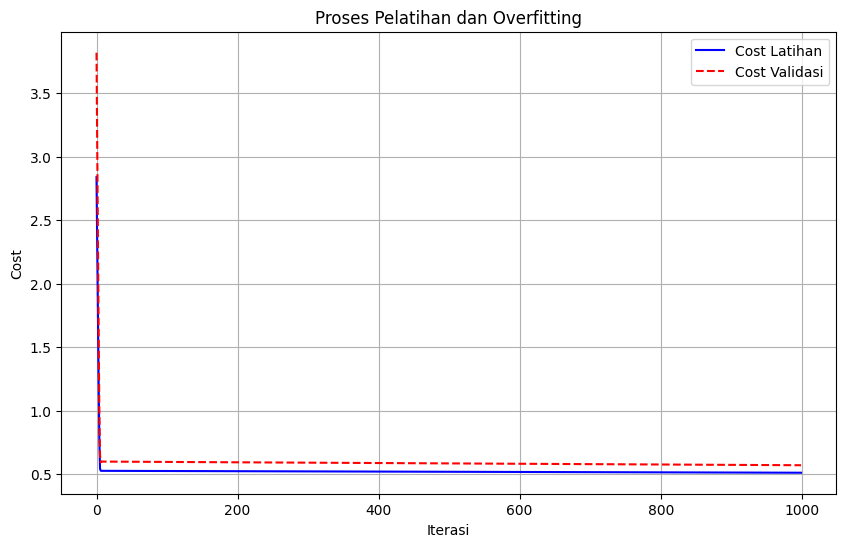


Parameter akhir: w1 = 0.1502, w2 = -1.1241, b = -2.3933
Cost akhir pada data latihan: 0.5115
Cost akhir pada data validasi: 0.5705

Prediksi pada data latihan: [1 1 1]
Probabilitas pada data latihan: [0.69002655 0.80829293 0.61348376]

Prediksi pada data validasi: [1 1]
Probabilitas pada data validasi: [0.73971493 0.56806015]


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Data latihan (x_train, y_train) dan data validasi (x_val, y_val)
x_train = np.array([[25, 0.5], [30, 0.6], [22, 0.4]])  # Data latihan
y_train = np.array([1, 1, 0])  # Label latihan

x_val = np.array([[27, 0.55], [20, 0.3]])  # Data validasi
y_val = np.array([1, 0])  # Label validasi

# Parameter model (inisialisasi awal)
w1 = 0.5
w2 = -1.2
b = -2
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Jumlah iterasi gradient descent

# List untuk menyimpan cost latihan dan validasi tiap iterasi
train_costs = []
val_costs = []

for i in range(num_iterations):
    # Hitung prediksi untuk data latihan
    z_train = w1 * x_train[:, 0] + w2 * x_train[:, 1] + b
    y_pred_train = 1 / (1 + np.exp(-z_train))
    
    # Hitung cost untuk data latihan (Binary Cross-Entropy Loss)
    cost_train = -(y_train * np.log(y_pred_train) + (1 - y_train) * np.log(1 - y_pred_train)).mean()

    # Hitung prediksi untuk data validasi
    z_val = w1 * x_val[:, 0] + w2 * x_val[:, 1] + b
    y_pred_val = 1 / (1 + np.exp(-z_val))
    
    # Hitung cost untuk data validasi
    cost_val = -(y_val * np.log(y_pred_val) + (1 - y_val) * np.log(1 - y_pred_val)).mean()

    # Simpan cost untuk plotting
    train_costs.append(cost_train)
    val_costs.append(cost_val)

    # Hitung gradien untuk setiap parameter
    d_w1 = ((y_pred_train - y_train) * x_train[:, 0]).mean()
    d_w2 = ((y_pred_train - y_train) * x_train[:, 1]).mean()
    d_b = (y_pred_train - y_train).mean()

    # Update parameter
    w1 -= learning_rate * d_w1
    w2 -= learning_rate * d_w2
    b -= learning_rate * d_b

# Visualisasi cost fungsi
plt.figure(figsize=(10, 6))
plt.plot(train_costs, label='Cost Latihan', color='blue')
plt.plot(val_costs, label='Cost Validasi', color='red', linestyle='dashed')
plt.title('Proses Pelatihan dan Overfitting')
plt.xlabel('Iterasi')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

# Prediksi akhir pada data latihan dan validasi
probabilitas_train = 1 / (1 + np.exp(-(w1 * x_train[:, 0] + w2 * x_train[:, 1] + b)))
prediksi_train = (probabilitas_train > 0.5).astype(int)

probabilitas_val = 1 / (1 + np.exp(-(w1 * x_val[:, 0] + w2 * x_val[:, 1] + b)))
prediksi_val = (probabilitas_val > 0.5).astype(int)

# Hasil akhir
print(f"\nParameter akhir: w1 = {w1:.4f}, w2 = {w2:.4f}, b = {b:.4f}")
print(f"Cost akhir pada data latihan: {train_costs[-1]:.4f}")
print(f"Cost akhir pada data validasi: {val_costs[-1]:.4f}")

# Prediksi pada data latihan
print(f"\nPrediksi pada data latihan: {prediksi_train}")
print(f"Probabilitas pada data latihan: {probabilitas_train}")

# Prediksi pada data validasi
print(f"\nPrediksi pada data validasi: {prediksi_val}")
print(f"Probabilitas pada data validasi: {probabilitas_val}")


Accuracy without Regularization: 0.8050


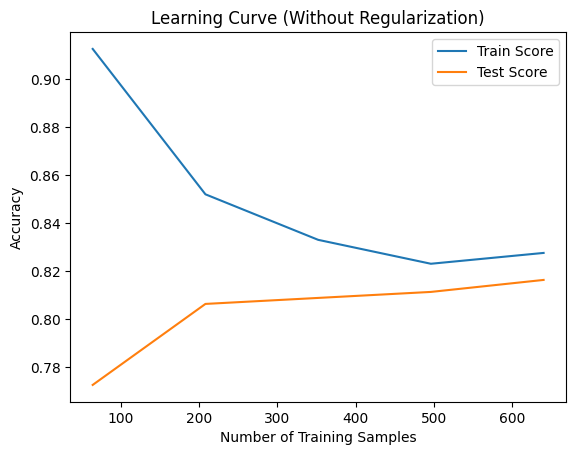

Accuracy with Regularization: 0.8050


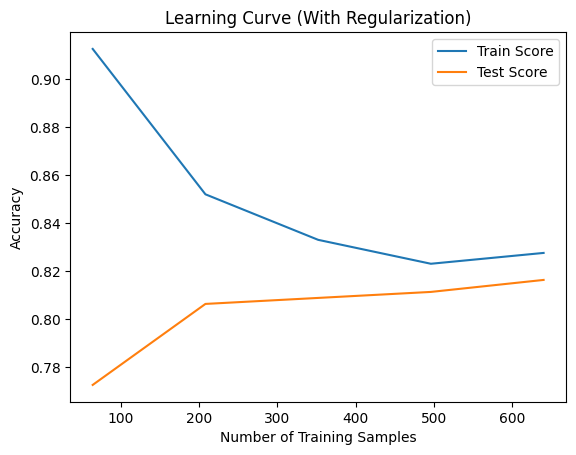

In [27]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model without regularization (Overfitting)
model_no_reg = LogisticRegression(max_iter=1000)
model_no_reg.fit(X_train, y_train)

# Predict and evaluate without regularization
y_pred_no_reg = model_no_reg.predict(X_test)
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)
print(f"Accuracy without Regularization: {accuracy_no_reg:.4f}")

# Plot learning curve to observe overfitting
train_sizes, train_scores, test_scores = learning_curve(model_no_reg, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score')
plt.title("Learning Curve (Without Regularization)")
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Train a Logistic Regression model with L2 regularization (to mitigate overfitting)
model_with_reg = LogisticRegression(max_iter=1000, C=1)  # C is the inverse of regularization strength
model_with_reg.fit(X_train, y_train)

# Predict and evaluate with regularization
y_pred_with_reg = model_with_reg.predict(X_test)
accuracy_with_reg = accuracy_score(y_test, y_pred_with_reg)
print(f"Accuracy with Regularization: {accuracy_with_reg:.4f}")

# Plot learning curve to show improvement with regularization
train_sizes, train_scores, test_scores = learning_curve(model_with_reg, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score')
plt.title("Learning Curve (With Regularization)")
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Optionally, use early stopping during training (this is a conceptual step, more relevant in neural networks)
# For logistic regression, we could adjust the `max_iter` and monitor the loss, but early stopping is typically used
# in deep learning models (e.g., with Keras or PyTorch).
